In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

print(tf.__version__)

2.4.1


In [2]:
train = pd.read_csv('./shopee-product-matching/train.csv')
print(train.shape) # ==> (34250, 5)
train.info()

(34250, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


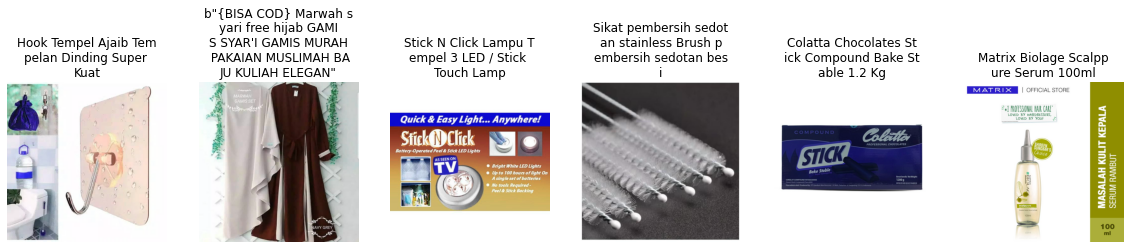

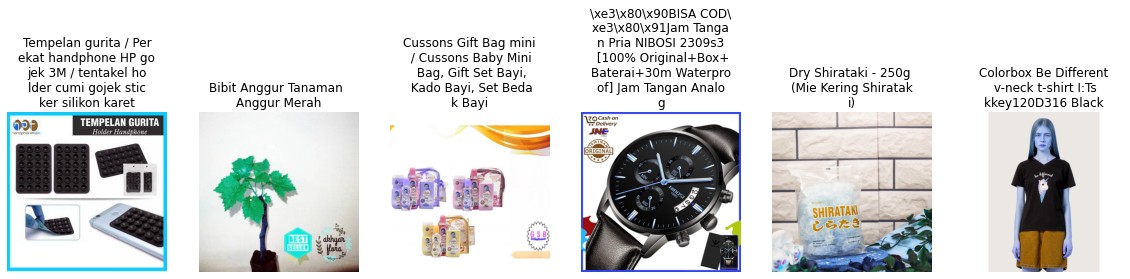

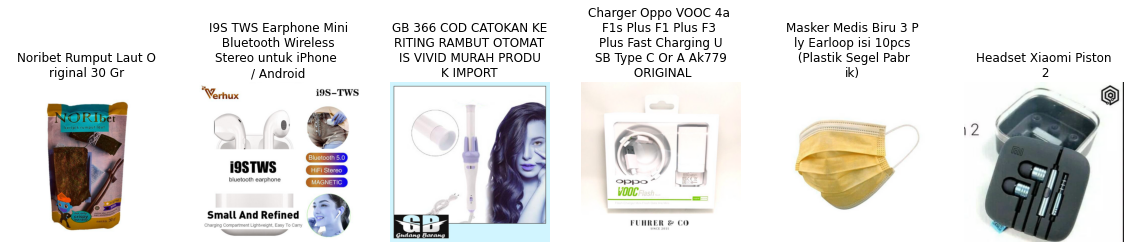

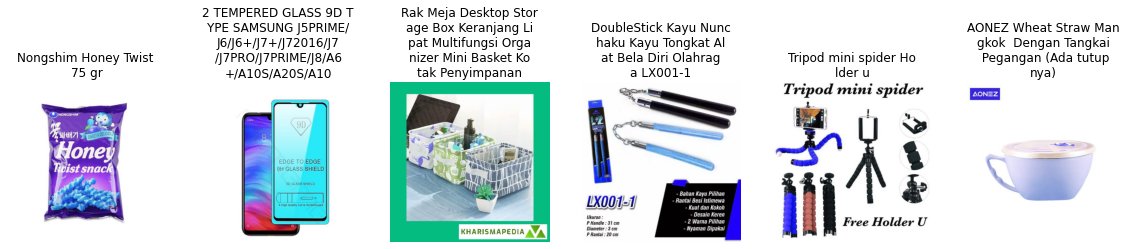

In [3]:
# Display Random Items from Train Data

base_dir = './shopee-product-matching/train_images/'

def displayIMG(df=None, random=False, rows=4, columns=6, path=base_dir):
    for r in range(rows):
        plt.figure(figsize=(20,5))
        for c in range(columns):
            
            if random : 
                row = np.random.randint(0, len(df))
            else: 
                row = columns*r + c
                
            name = df.iloc[row, 1]
            title =train.iloc[row,3]
            
            title_with_return = ""
            for idx,word in enumerate(title):
                title_with_return += word
                if (idx!=0)&(idx%20==0): title_with_return += '\n'
                    
            image = cv2.imread(path + name)
            plt.subplot(1,columns, c+1)
            plt.title(title_with_return)
            plt.axis('off')
            plt.imshow(image)
        plt.show()
        
displayIMG(df=train, random=True)

11014


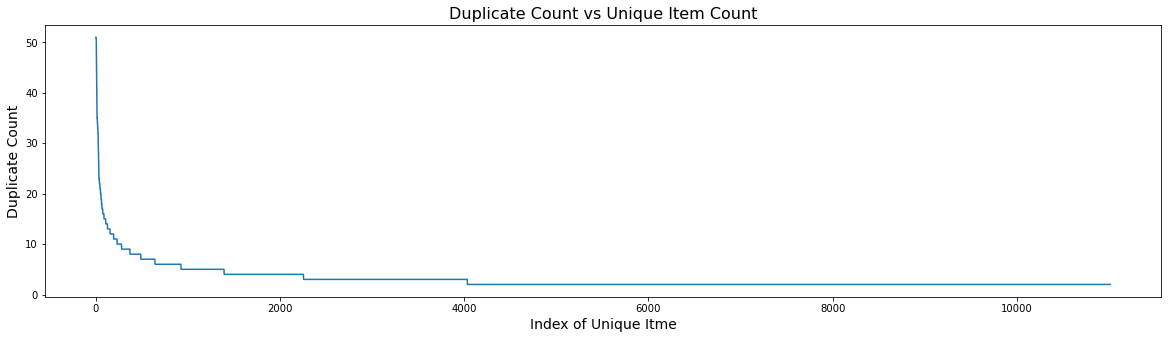

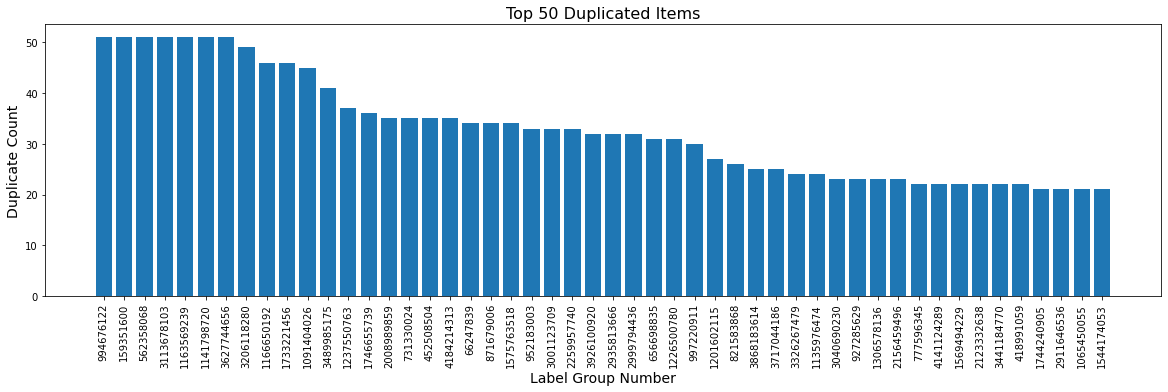

In [4]:
group = train.label_group.value_counts()
# print(group)
print(len(group))

plt.figure(figsize=(20,5))
plt.plot(np.arange(len(group)), group.values)
plt.title('Duplicate Count vs Unique Item Count', size=16)
plt.xlabel('Index of Unique Itme', size=14)
plt.ylabel('Duplicate Count', size=14)
plt.show()

plt.figure(figsize=(20,5))
plt.bar(group.index.values[:50].astype('str'), group.values[:50])
plt.xticks(rotation=90)
plt.ylabel('Duplicate Count', size=14)
plt.xlabel('Label Group Number', size=14)
plt.title('Top 50 Duplicated Items', size=16)
plt.show()

########################################
## Top1 Duplicated Item num : 994676122
########################################


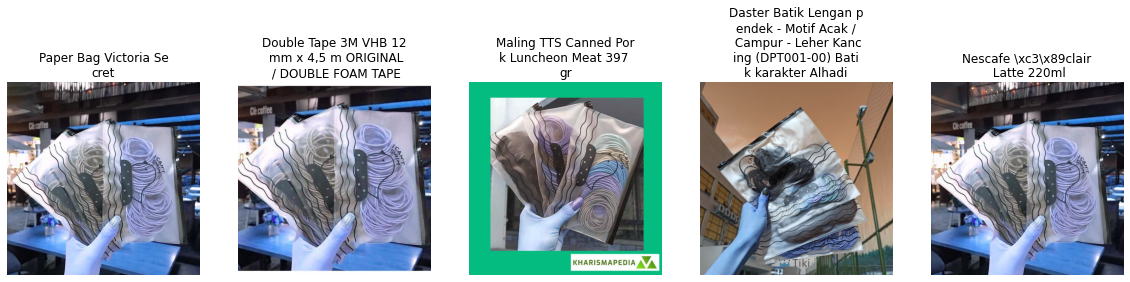

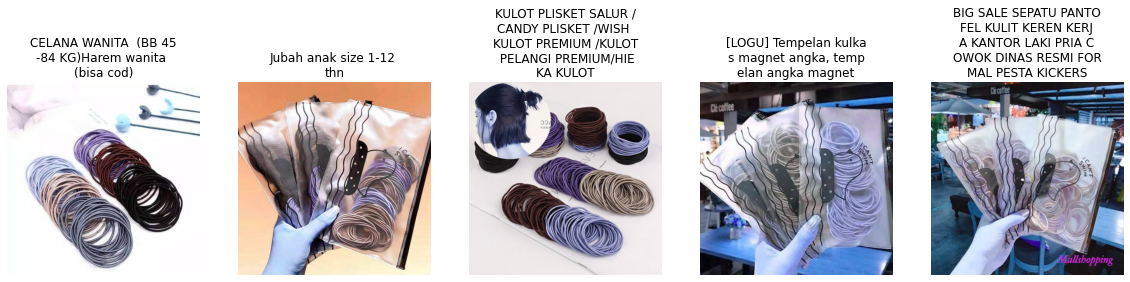

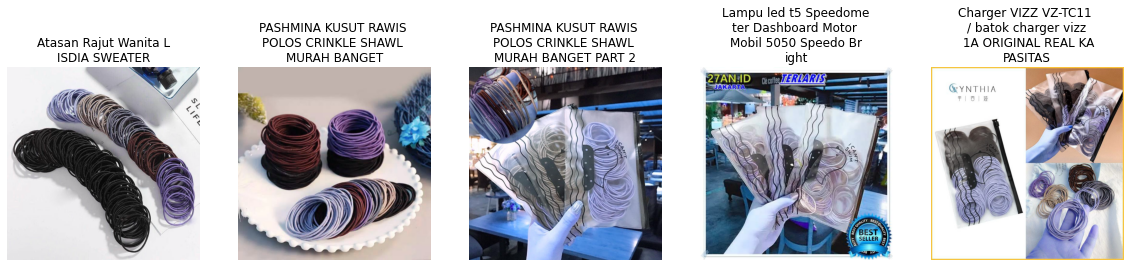

########################################
## Top2 Duplicated Item num : 159351600
########################################


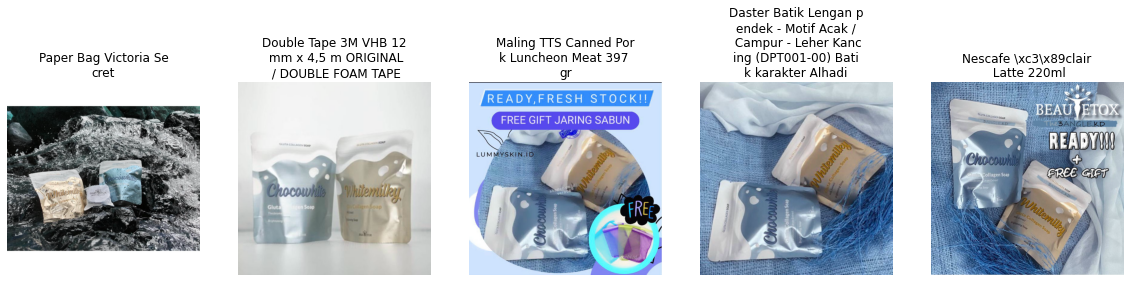

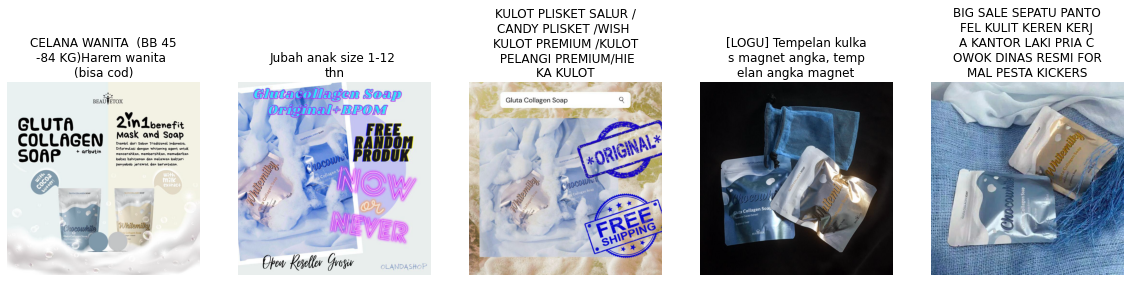

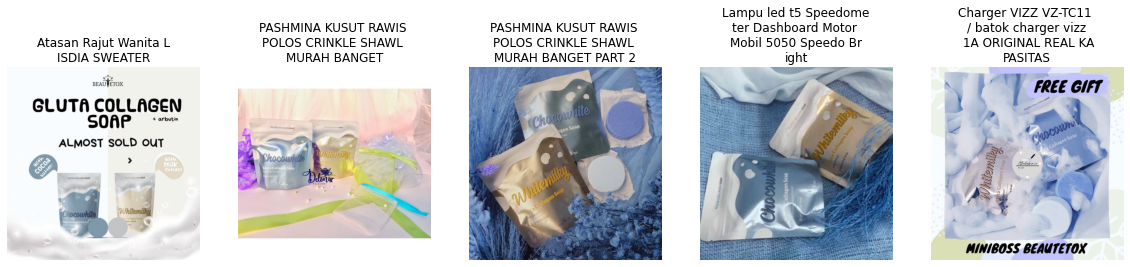

########################################
## Top3 Duplicated Item num : 562358068
########################################


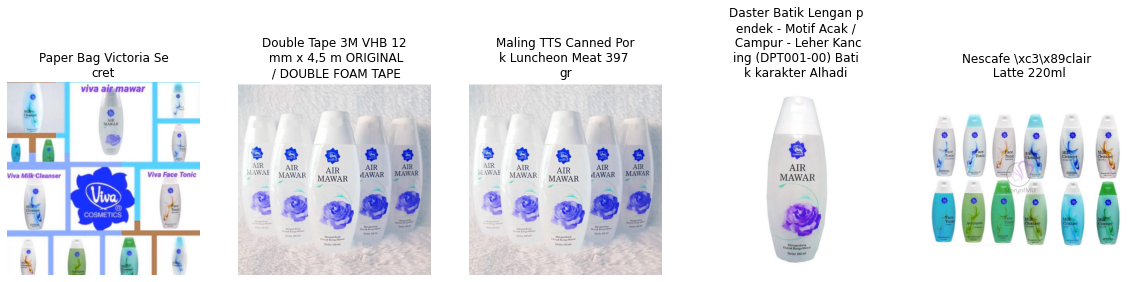

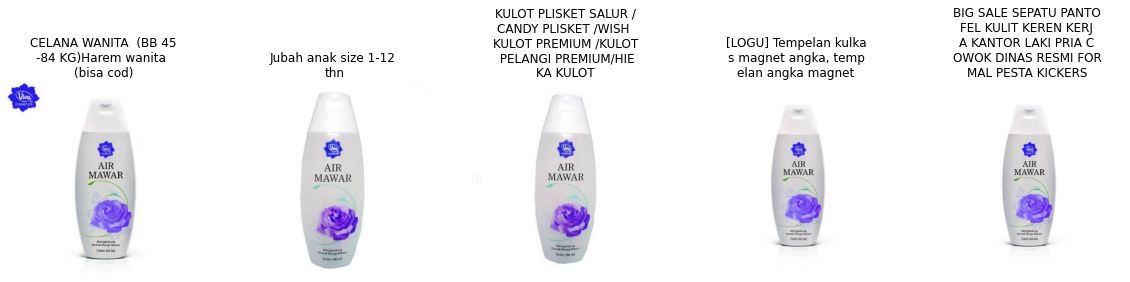

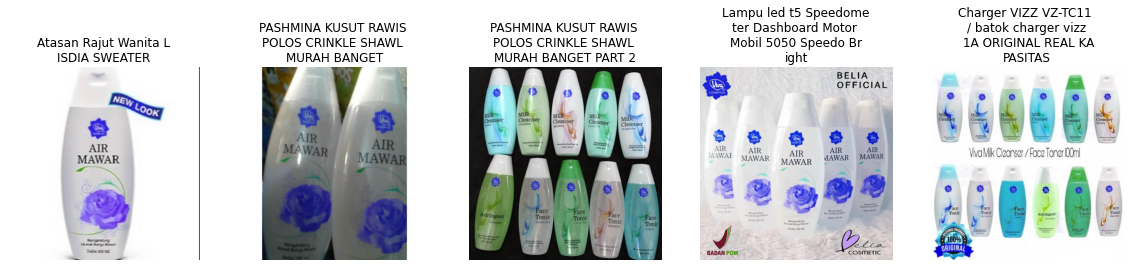

########################################
## Top4 Duplicated Item num : 3113678103
########################################


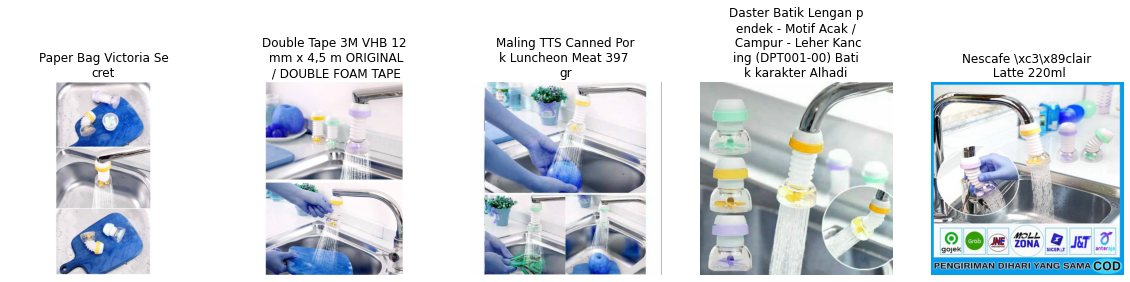

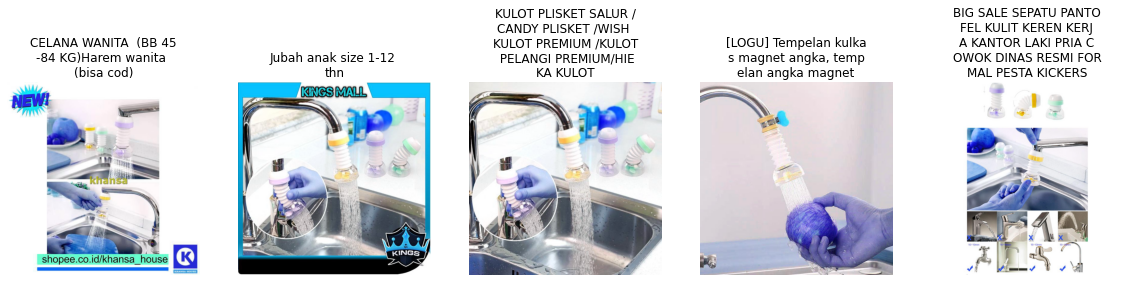

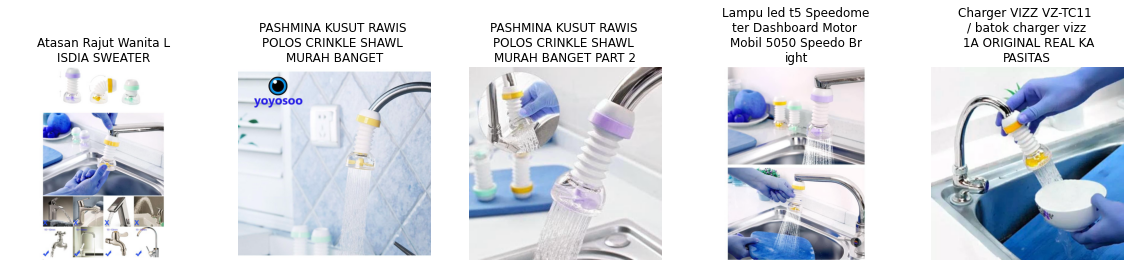

########################################
## Top5 Duplicated Item num : 1163569239
########################################


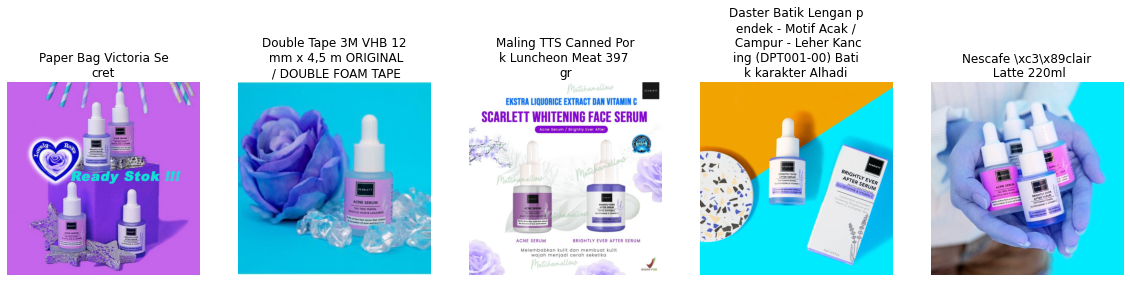

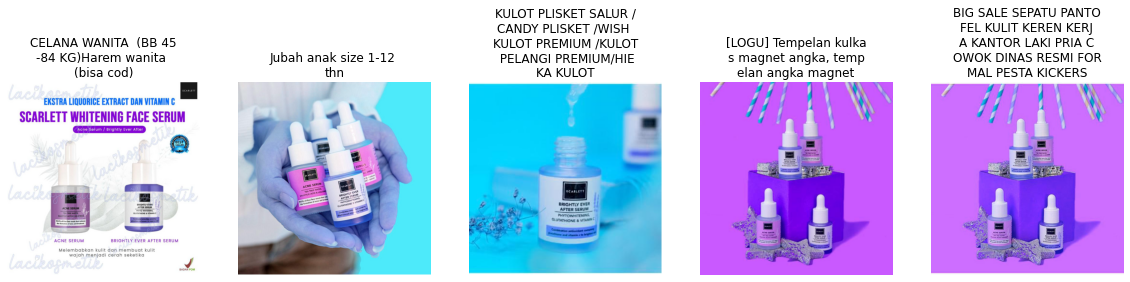

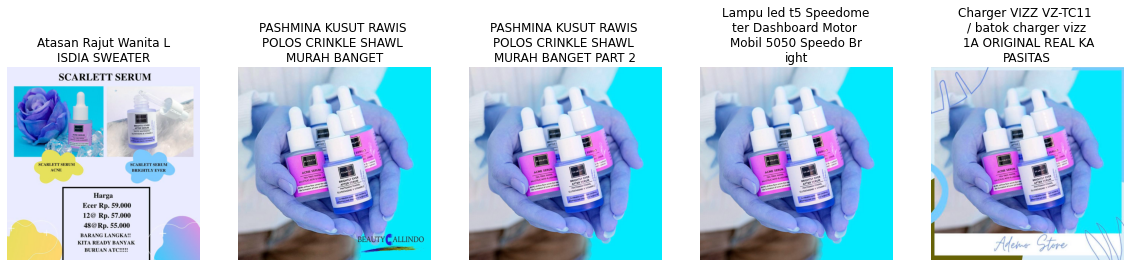

In [5]:
# 상위 5개 동일물품 image 15 개 (3 x 5)

for i in range(5):
    print('#' * 40)
    print('## Top{} Duplicated Item num : {}'.format(i+1, group.index[i]))
    print('#' * 40)
    
    image_df = train.loc[train.label_group == group.index[i]]
    
    displayIMG(image_df, False, 3, 5)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

model = TfidfVectorizer(stop_words='english', binary=True)
text_embeddings = model.fit_transform(train.title).toarray()
# print(type(text_embeddings))
# print(text_embeddings)
# print(text_embeddings.shape)

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(34250, 24939)


In [8]:
knn = 50
model = NearestNeighbors(n_neighbors=knn)
model.fit(text_embeddings)
distance, indices = model.kneighbors(text_embeddings)
print(type(distance))
print(distance)

<class 'numpy.ndarray'>
[[0.         0.         1.09588335 ... 1.29393848 1.29497383 1.29540243]
 [0.         0.90469994 0.93973616 ... 1.28895669 1.2915127  1.29195763]
 [0.         0.82217635 1.28080405 ... 1.36989599 1.37007924 1.37009067]
 ...
 [0.         0.8017645  0.84695612 ... 1.29549236 1.29566796 1.29600128]
 [0.         0.811434   0.82256545 ... 1.32744505 1.32800305 1.32819192]
 [0.         0.88366333 1.12109207 ... 1.29676439 1.29701724 1.30207546]]


In [10]:
print(type(indices))
print(indices)

<class 'numpy.ndarray'>
[[    0 33161  9219 ... 14456  7147  7433]
 [    1 18683 23593 ... 21923   666 28859]
 [    2 15668  6353 ... 21075 11305  6162]
 ...
 [34247 18379 13116 ... 33794 10320 29336]
 [34248 13887 20813 ... 22306  5554 14443]
 [34249 33792 13152 ... 17742 30214 15478]]


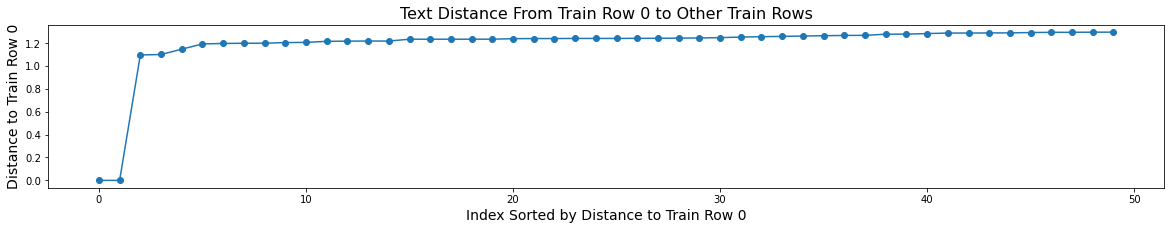

                                                   title  label_group
0                              Paper Bag Victoria Secret    249114794
33161                          PAPER BAG VICTORIA SECRET    249114794
9219                             PAPER BAG THE BODY SHOP    471581622
25386  READY! GRATIS ISI ULANG! Pengharum parfum mobi...    866425052
31159                      Paper Bag The Body Shop Small    471581622
8469   b"victoria iria Goat's Milk Hand Body Lotion 2...    865318054
2676           Paper Bag Tas Kertas Polos Ukuran 18x5x22    982607408
30518                           VELROSE SECRET FACE MASK   2992234715
4156   Dengan Paper Bag TABITA EXCLUSIVE ORIGINAL KEM...   2591192196
28498              WARDAH WHITE SECRET FACIAL WASH 100ml   1952691729


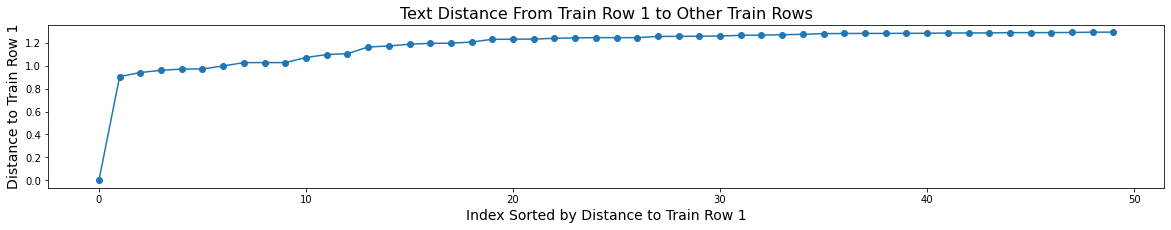

                                                   title  label_group
1      Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045
18683  Double Tape VHB 3M ORIGINAL 12mm x 4.5mm Busa ...   2937985045
23593  Double Tape 3M 4900 VHB 24 mm x 4.5m tebal 1.1...   2819310070
25199  3M VHB 12mm x 4.5m Double Tape Foam Merah Otom...   2819310070
194    3M VHB Double Tape Automotive 4900 tebal 1.1 m...   2819310070
469    3M VHB Double Tape Automotive 4900 tebal 1.1 m...   2819310070
4774   3M 1600 T Double Tape PE Foam tebal: 1.0 mm, s...    475342649
19262  DOUBLE TAPE BUSA 3M Pe Foam Tape 24mm x 4M ORI...    475342649
21790  DOUBLE TAPE BUSA 3M Pe Foam Tape 24mm x 4M ORI...    475342649
10444  DOUBLE TAPE BUSA 3M Pe Foam Tape 24mm x 4M ORI...    475342649


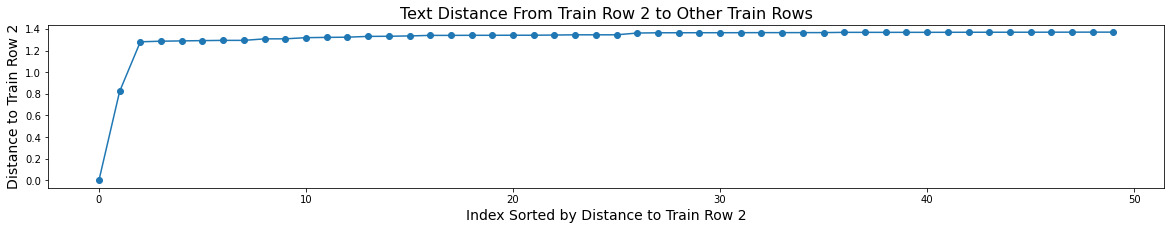

                                                   title  label_group
2            Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891
15668            Maling Ham Pork Luncheon Meat TTS 397gr   2395904891
6353                    MEAT GRINDER / PENGGILING DAGING   3760480756
25580                        Samcan babi atau Pork Belly   2572087261
205                               M031 Alarm anti maling   1943235893
5294   Life Cat Pounch 85gr Makanan Basah Kucing No Pork   1300007930
22085     Gembok Alarm Ring Panjang / Gembok Anti Maling   3940507552
17339  Gembok Alarm Ring Panjang / Gembok anti maling...   3940507552
33978  b"Pigeon Toddy Palm's Seed in Syrup Canned- Lo...   1890922178
1943   1KG DAGING BABI HAS DALAM ( FRESH TENDERLOIN M...    567923746


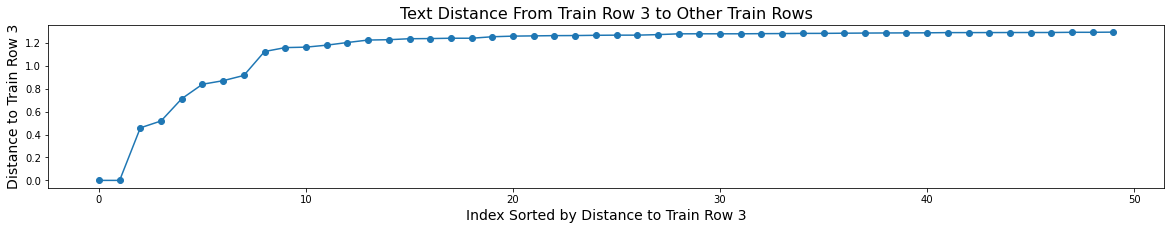

                                                   title  label_group
3      Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188
28878  Daster Batik Lengan pendek - Motif Acak / Camp...   3150867956
32290  Daster Batik Lengan pendek - Motif Acak / Camp...   2453599242
2522   Daster Batik Lengan pendek - Motif Acak / Camp...    264184112
20105  Daster Batik Bali Lengan pendek - Motif Acak /...   3150867956
27637  Daster payung klok motif acak/campur leher kan...   2560881468
27812  Daster Karakter - Leher Kancing (DPT001-00) Bu...   1773396944
22183  Daster Payung Bali JUMBO XXL, Motif Acak / Cam...   2560881468
18753  DASTER KARAKTER lengan pendek/motif campur kat...   1773396944
4981                Daster Batik Anak Tanpa Lengan putih   1339781222


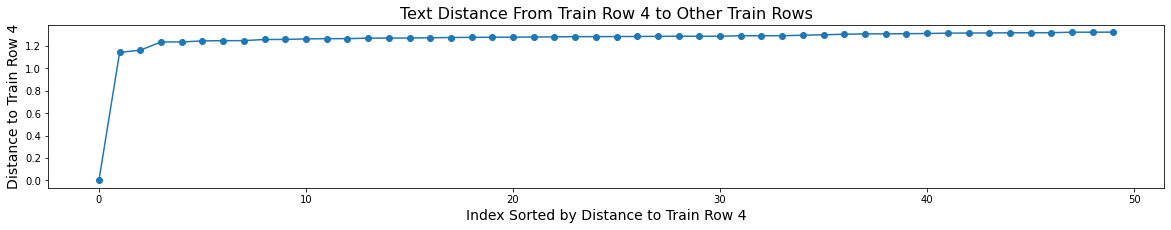

                                                   title  label_group
4                      Nescafe \xc3\x89clair Latte 220ml   3648931069
18449                    Nescafe Eclair Latte Pet 220 Ml   3648931069
252                                      Nescafe classic   3030935442
3863                               Torabika Creamy Latte   2111685755
11352                              Torabika creamy latte   2111685755
2900                            Kopi Nescafe Classic 2gr   3030935442
9438                   Refill Kopi Nescafe Classic 100gr      9958453
8890                   Refill Kopi Nescafe Classic 100gr      9958453
27836  BIOAQUA Aloe Vera Soothing Moisture 92% Pelemb...   3115028838
29452                    Kopi NESCAFE Classic sachet 2gr   3030935442


In [12]:
for i in range(5):
    plt.figure(figsize=(20,3))
    plt.plot(np.arange(50), distance[i], 'o-')
    plt.title('Text Distance From Train Row %i to Other Train Rows' %i, size=16 )
    plt.ylabel('Distance to Train Row %i' %i, size=14)
    plt.xlabel('Index Sorted by Distance to Train Row %i' %i, size=14)
    plt.show()
    
    print(train.loc[indices[i, :10], ['title', 'label_group']])

In [3]:
## tf record
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm.notebook import tqdm
from PIL import Image
import io

def _bytes_feature(value):
    # string / byte 타입 (문자열)을 받아서 byte list(feature객체)를 리턴.
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    # float / double 타입을 받아서 float list를 리턴
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _floatarray_feature(array):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=array))

def _int64_feature(value):
    # bool / enum / int / uint 타입을 받아서 int64 list를 리턴
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def _validate_text(text):
    """If text is not str or unicode, then try to convert it to str."""
    if isinstance(text, str):
        return text
    elif isinstance(text, 'unicode'):
        return text.encode('utf8', 'ignore')
    else:
        return str(text)

# image pixel 값 담고 있는 dataframe
BASE = './shopee-product-matching/train_images/'

df = train[['posting_id', 'image', 'label_group']]

df['img_path'] = df['image'].apply(lambda x : BASE + x)

df.drop('image', axis=1, inplace=True)

print(df.shape)
df.head()


(34250, 3)


/home/ubuntu/anaconda3/envs/cnn_env/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ubuntu/anaconda3/envs/cnn_env/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


posting_id  label_group  \
0   train_129225211    249114794   
1  train_3386243561   2937985045   
2  train_2288590299   2395904891   
3  train_2406599165   4093212188   
4  train_3369186413   3648931069   

                                            img_path  
0  ./shopee-product-matching/train_images/0000a68...  
1  ./shopee-product-matching/train_images/0003978...  
2  ./shopee-product-matching/train_images/000a190...  
3  ./shopee-product-matching/train_images/00117e4...  
4  ./shopee-product-matching/train_images/00136d1...

In [46]:
# TFRecord 함수

def to_tfrecord(df, tfrecord_name):
    print('tfrecord convert 시작')
    
    options = tf.io.TFRecordOptions(compression_type='GZIP')
    
    with tf.io.TFRecordWriter(path=os.path.join(tfrecord_name + '.tfrecords'),
                              options=options) as writer:
        for img_path in tqdm(df['img_path'],
                               total=len(df),
                               position=0,
                               leave=True):
            _binary_image = tf.io.read_file(img_path)
            
            my_features = tf.train.Features(feature={
                'img_raw' : _bytes_feature(_binary_image) ,
#                 'posting_id' : _bytes_feature(posting_id.encode()),
#                 'label_group' : _int64_feature(label_group)
            })
            
            string_set = tf.train.Example(features=my_features)
            
            writer.write(string_set.SerializeToString())

## Data Split 
train_df, test_df = train_test_split(df, test_size=0.3, random_state=0)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=1)

In [47]:
## TFRecord 생성
to_tfrecord(train_df, 'shopee_train')
to_tfrecord(test_df, 'shopee_test')
to_tfrecord(val_df, 'shopee_val')

tfrecord convert 시작


  0%|          | 0/19180 [00:00<?, ?it/s]

tfrecord convert 시작


  0%|          | 0/10275 [00:00<?, ?it/s]

tfrecord convert 시작


  0%|          | 0/4795 [00:00<?, ?it/s]

In [48]:

# TFRecordDataset를 사용할 때 필요한 parameter
BUFFER_SIZE = 200
BATCH_SIZE = 128
NUM_CLASS = 2
IMAGE_SIZE = 224

image_feature_description = {
    'img_raw' : tf.io.FixedLenFeature([], tf.string)
#     'posting_id' : tf.io.FixedLenFeature([], tf.string),
#     'label_group' : tf.io.FixedLenFeature([], tf.int64)
}

############### TFRecordDataset 처리 위한 함수 ################

# 읽어들인 TFRecord를 다음의 형태(dict)로 변환하는 함수
# <ParallelMapDataset shapes: {id: (), image_raw: (), label: ()}, 
#                     types: {id: tf.string, image_raw: tf.string, label: tf.int64}>
def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, 
                                      image_feature_description)

# 위에서 얻은 ParallelMapDataset를 다음의 형태(shape)로 변환하는 함수
# <ParallelMapDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>
def map_func(target_record):
    img = target_record['img_raw']
#     label = target_record['label_group']
#     posting_id = target_record['posting_id']
    
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.dtypes.cast(img, tf.int64)
    
    return img


# 전처리(resize & augmentation) 함수
# 이미지 데이터 normalization
# 이 처리를 하는 대신 tf.keras.applications.mobilenet.preprocess_input() 함수를 이용하는것이 좋음
# 우리예제는 TFRecord 생성 시 원본 size로 저장했기 때문에 image resize를 해야함.
def image_resize_func(image):
    # result_image = image / 255
    result_image = tf.image.resize(image, (IMAGE_SIZE,IMAGE_SIZE))   
    return result_image


# 각각의 pretrained network마다 
# tensorflow.keras.applications.mobilenet.preprocess_input(image) 작업을 수행해야 함.
# 이부분에 대해서는 조금 더 알아봐야 함.
# 만약 multinomial classification이기 때문에 one_hot처리도 필요함.
def post_process_func(image):

#     result_image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    result_image = tf.keras.applications.mobilenet.preprocess_input(image)    
#    onehot_label = tf.one_hot(label, depth=1049)    # binary인 경우 one_hot 사용안함.    
#     return result_image, onehot_label
    return result_image

####################################################################################################

def tfrecord_dataset(file_path):

    # TFRecordDataset 객체 생성
    dataset = tf.data.TFRecordDataset(file_path, 
                                    compression_type='GZIP')

    # TFRecordDataset 각 feature들을 example 객체로 파싱??
    dataset = dataset.map(_parse_image_function, 
                        num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # 파싱한 example 객체 안 data shape을 이미지 처리에 맞게 변경?
    dataset = dataset.map(map_func, 
                        num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # dataset cache 처리 
    dataset = dataset.cache()

    # dataset shuffle 처리
    # BUFFER_SIZE 개수만큼 가져와서 셔플 한다. 
    dataset = dataset.shuffle(BUFFER_SIZE)

    # 전처리(resize & auigmentation)
    dataset = dataset.map(image_resize_func, 
                        num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # BatchDataset으로 변환
    # <BatchDataset shapes: ((None, None, None, 3), (None,)), types: (tf.float32, tf.int64)>
    # BatchDataset으로 변환하기 전에 image의 resize(전처리)가 일어나야 한다. 그렇지 않으면 
    # shape이 달라 batch처리가 되지 않는다는 오류 발생.
    dataset = dataset.batch(BATCH_SIZE)

    # pretrained network의 preprocess_input() 호출
    # one_hot encoding 처리
#     dataset = dataset.map(post_process_func, 
#                         num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # prefetch처리
    # prefetch는 전처리와 학습과정의 모델 실행을 오버랩.
    # 모델이 s스텝 학습을 실행하는 동안 입력 파이프라인은 s+1스텝의 데이터를 읽어서 수행속도를 높임.
    # <PrefetchDataset shapes: ((None, None, None, 3), (None,)), types: (tf.float32, tf.int64)>
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>


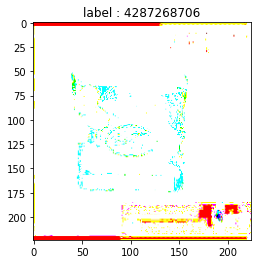

In [49]:
train_tfrecord_path = './shopee_train.tfrecords'
test_tfrecord_path = './shopee_test.tfrecords'
val_tfrecord_path = './shopee_val.tfrecords'

train_dataset = tfrecord_dataset(train_tfrecord_path)
val_dataset = tfrecord_dataset(val_tfrecord_path)
test_dataset = tfrecord_dataset(test_tfrecord_path)

for batch_x in train_dataset:
    print(batch_x.shape)
    print(type(batch_x))

    plt.figure()
    plt.imshow(batch_x[0].numpy())
    plt.title('label : {}'.format(batch_y[0]))
    plt.show()

    break

In [ ]:
model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg', input_shape=None)
image_embeddings = model.predict(train_dataset)
print('image embeddings shape is',image_embeddings.shape)

In [1]:
import cudf, cuml, cupy
from cuml.feature_extraction.text import TfidfVectorizer
from cuml.neighbors import NearestNeighbors
print(cuml.__version__)


/home/ubuntu/anaconda3/envs/cnn_env/lib/python3.7/site-packages/cudf/utils/gpu_utils.py:93: UserWarning: You will need a GPU with NVIDIA Pascal™ or newer architecture
Detected GPU 0: Tesla M60 
Detected Compute Capability: 5.2
  f"You will need a GPU with NVIDIA Pascal™ or "


0.18.0


In [ ]:
# Load Train on the GPU with cudf

train_cf = cudf.read_csv('./shopee-product-matching/train.csv')
print(train_cf.shape)
train_cf.head()

In [ ]:
# Extract Text Embeddings with RAPIDS TfidfVectorizer

## TfidfVectorizer returns a cupy sparse matrix. 
## Afterward we convert to a cupy dense matrix and feed that into RAPIDS cuML KNN.

model = TfidVectorizer(stop_words='english', binary=True)
text_embeddings = model.fit_transform(train_cf.title).toarray()
print("text_embeddings's shape :", text_embeddings.shape)

In [ ]:
# Find Similar Titles with RAPIDS KNN

# after fitting KNN, we will display some example rows of train and their 10 closest other titles in train
# (based on word count one-hot-encoding)

KNN = 50
model =NearestNeighbors(n_neighbors=KNN)
model.fit(text_embeddings)
distance, indices = model.kneighbors(text_embeddings)

In [2]:
from cudf._cuda.gpu import getDeviceCount
print(getDeviceCount())

ModuleNotFoundError: No module named 'cudf._cuda'

In [5]:
# RESTRICT TENSORFLOW TO 12GB OF GPU RAM
# SO THAT WE HAVE GPU RAM FOR RAPIDS CUML KNN
LIMIT = 1
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*LIMIT)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)
print('Restrict TensorFlow to max %iGB GPU RAM'%LIMIT)
print('so RAPIDS can use %iGB GPU RAM'%(16-LIMIT))

Restrict TensorFlow to max 1GB GPU RAM
so RAPIDS can use 15GB GPU RAM
